In [1]:
# The Moon's Topography

In [2]:
# Loading the libraries
import numpy as np
import matplotlib.pyplot as plt
import netCDF4

# Makes the plots inline in the notebook
%matplotlib inline

# Data Source: https://ode.rsl.wustl.edu/moon/indexDatasets.aspx
# # To read in .nc files
# import sys
# !{sys.executable} -m pip install netCDF4


ModuleNotFoundError: No module named 'netCDF4'

In [3]:
# Reading in the NASA PDS topographical data into an array
fname_moon = 'lunar-topo.dat'
moon_topo = np.genfromtxt(fname_moon)

# According to the documentation, the file is supposed to be 
# 180x360 so we must reshape
moon_reshaped = np.reshape(moon_topo, (180,360))

In [4]:
# Creating an array of the latitude and longitude values used
## The documentation specifies that latitude is from 89.5 to -89.5
## and that longitude spans from 0.5 to 359.5
lat_moon  = np.linspace(89.5, -89.5, 360)
long_moon = np.linspace(0.5,  359.5, 180)

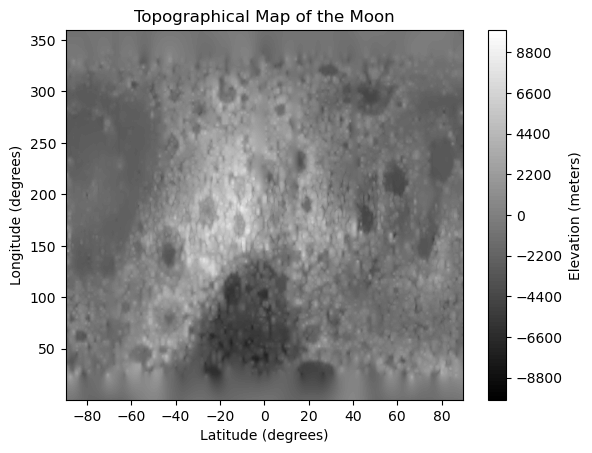

In [5]:
# Plotting the topography of the Moon
plt.contourf(lat_moon, long_moon, moon_reshaped, levels=np.linspace(-10000,10000,101), cmap='gray')

# Changing the coloring of features
contours_color = plt.colorbar()
contours_color.set_label("Elevation (meters)")

# Giving it a title and labelling the axes
plt.title("Topographical Map of the Moon")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Longitude (degrees)")

# Outputting the plot
plt.savefig('Moon Topography')
plt.show()

In [6]:
## Mars Topography

In [7]:
# Reading in the Mars topographic file
fname_mars = 'mars-topo.nc'
mars_topo = netCDF4.Dataset(fname_mars)

In [8]:
# Specifying the latitude, longitude, and elevation variables
# from the topographic dataset read in
lat_mars  = mars_topo.variables['latitude'][:]
long_mars = mars_topo.variables['longitude'][:]
elevation = mars_topo.variables['zMOL'][:] * 1000

In [1]:
# Plotting the topography of the Mars
## Used the same scale as the moon to be able to clearly see the differences
## Doesn't omit Mons - just makes it a brighter yellow/white to be able to see
## some of the smaller differences on the surface of Mars
plt.contourf( lat_mars, long_mars, elevation, levels=np.linspace(-10000,10000,101), cmap='gray')

# Changing the coloring of features
contours_color = plt.colorbar()
contours_color.set_label("Elevation (meters)")

# Giving it a title and labelling the axes
plt.title("Topographical Map of Mars")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Longitude (degrees)")

# Outputting the plot
plt.savefig('Mars Topography')
plt.show()

NameError: name 'plt' is not defined

In [10]:
# Flattening the moon data to make a histogram of the altitudes present
# on the surface
moon_flat = moon_reshaped.flatten()

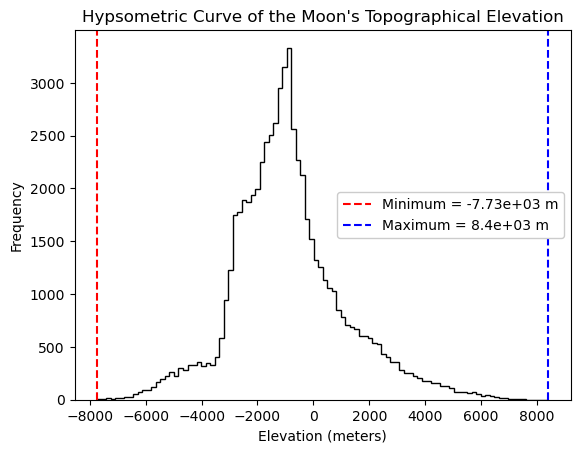

In [11]:
### PLOTTING HYPSOMETRIC CURVES ###

# For the moon
plt.hist(moon_flat, color = "black", bins = 100, histtype = "step")

# Giving it a title and labelling the axes
plt.title("Hypsometric Curve of the Moon's Topographical Elevation")
plt.xlabel("Elevation (meters)")
plt.ylabel("Frequency")

# Finding the minimum and maximum of the data to label on the curve
min_moon = moon_flat.min()
max_moon = moon_flat.max()

# Adding the label to the plot
plt.axvline(min_moon, label = 'Minimum = %.3g m'%min_moon, ls='--', c = 'r')
plt.axvline(max_moon, label = 'Maximum = %.3g m'%max_moon, ls='--', c = 'b')

# Positioning the legend
plt.legend(loc = 5, framealpha = 1)

# Outputting the plot
plt.show()

In [12]:
# Flattening the mars data to make a histogram of the altitudes present
# on the surface
mars_flat = elevation.flatten()

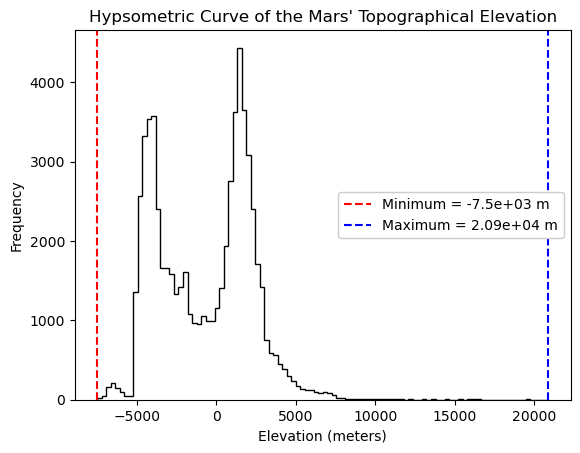

In [13]:
### PLOTTING HYPSOMETRIC CURVES ###

# For mars
plt.hist(mars_flat, color = "black", bins = 100, histtype = "step")

# Giving it a title and labelling the axes
plt.title("Hypsometric Curve of the Mars' Topographical Elevation")
plt.xlabel("Elevation (meters)")
plt.ylabel("Frequency")

# Finding the minimum and maximum of the data to label on the curve
min_mars = mars_flat.min()
max_mars = mars_flat.max()

# Adding the label to the plot
plt.axvline(min_mars, label = 'Minimum = %.3g m'%min_mars, ls='--', c = 'r')
plt.axvline(max_mars, label = 'Maximum = %.3g m'%max_mars, ls='--', c = 'b')

# Positioning the legend
plt.legend(loc = 5, framealpha = 1)

# Outputting the plot
plt.show()